# скрипт #03 v_2 с интерполированными данными
<hr>

# страндарные библиотеки для работы

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from IPython.core.display import HTML

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# sklearn packages
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [4]:
fileNames=['interpolateDataBath1001.csv', 'interpolateDataBath1003.csv', 
            'interpolateDataBath1004.csv', 'interpolateDataBath1005.csv',
            'interpolateDataBath1006.csv', 'interpolateData5in1.csv']
path='../ITC RUSAL/baths_v2/'
bathNumber=['1001','1003','1004','1005','1006']

In [5]:
# data[0] - 1001, 1 - 1003, 2 - 1004, 3 - 1005, 4 - 1006
data=[]
for dataset in fileNames:
    data.append(pd.read_csv(path+dataset))


In [6]:
fullNames=['АЭ: длит. <Сред.>', 'АЭ: кол-во <Сред.>', 'АЭ: напр. ср.м. <Сред.>(В)',
            'Время в недопитке <Сред.> (час)', 'Время в номинале <Сред.> (час)',
            'Время  в перепитке <Сред.> (час)', 'Время в тесте <Сред.> (час)', 
            'Время на голод. <Сред.> (час)', 'Кол-во доз АПГ в недопитке <Сумма> (шт.)',
            'Кол-во доз АПГ в номинале <Сумма> (шт.)', 'Кол-во доз АПГ в перепитке <Сумма> (шт.)',
            'Кол-во доз АПГ в тесте <Сумма> (шт.)', 'Напр. зад. <Сред.> (В)', 'Напр. эл-ра <Сред.> (В)',
            'Настыль: длина <Сред.> (см)', 'Подина: состояние <Сред.> (оц.)', 
            'РМПР: длит. ВИРА <Сред.> (сек)', 'РМПР: длит. МАЙНА <Сред.> (сек)', 
            'РМПР: коэфф. <Сред.>', 'РМПР: кол-во ВИРА <Сред.> (шт)', 'РМПР: кол-во МАЙНА <Сред.> (шт)',
            'Эл-лит: темп-ра <Сред.> (°C)', 'Металл: уровень <Сред.> (см)', 'Эл-лит: уровень <Сред.> (см)', 
            'Шум <Сред.> (В)', 'Эл-лит: CaF2 <Сред.> (%)', 'Эл-лит: КО <Сред.>', 'AlF3: добавка <Сред.> (кг)',
            'Напр. анода <Сред.> (В)' ]
fullNames_2=['Выход на в.сутки: Кр/весы <Сред.> (кг)', 'Выход на в.сутки: Л/О <Сред.> (кг)',
            'Выход на в.сутки: по заданию <Сред.> (кг)', 'Выход по току: Л/О <Сред.> (%)',
            'Ток серии (АСУТП) <Сред.> (кА)']

In [7]:
fullNames.remove('Кол-во доз АПГ в тесте <Сумма> (шт.)')
fullNames.remove('Время в тесте <Сред.> (час)')
fullNamesInRussian=fullNames+fullNames_2

# Некоторые модели машинного обучения по данным $ X(t) \rightarrow Y(t) $

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

In [10]:
# скрипт далее повторяет ранее использованный для заполнения среденим и knn
# используем старые названия переменных с новыми данными
dataScImpMean=data[0:5]
data5ni1Mean=data[5]

In [11]:
trainImpMean=[None]*5
testImpMean=[None]*5
for i in range(5):
    trainImpMean[i], testImpMean[i] = train_test_split(dataScImpMean[i], test_size=0.25)
train5in1ImpMean, test5in1ImpMean = train_test_split(data5ni1Mean, test_size=0.25)

## линейная модель (оценка снизу)

In [12]:
# для параметра EKO
modelLinearMeanEKO=[None]*6
rmseLinearMeanEKO=[None]*6
r2scoreLinearMeanEKO=[None]*6

# для параметра ETEMP
modelLinearMeanETEMP=[None]*6
rmseLinearMeanETEMP=[None]*6
r2scoreLinearMeanETEMP=[None]*6

for i in range(5):

    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values
    
    modelLinearMeanEKO[i] = LinearRegression()
    modelLinearMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelLinearMeanEKO[i].predict(testInputsEKO)
    
    rmseLinearMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreLinearMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру ETEMP по ваннам
    trainInputsETEMP = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsETEMP = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    modelLinearMeanETEMP[i] = LinearRegression()
    modelLinearMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelLinearMeanETEMP[i].predict(testInputsETEMP)
    
    rmseLinearMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreLinearMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

modelLinearMeanEKO[5] = LinearRegression()
modelLinearMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelLinearMeanEKO[5].predict(testInputs5in1EKO)

rmseLinearMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreLinearMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1ETEMP = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

modelLinearMeanETEMP[5] = LinearRegression()
modelLinearMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelLinearMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseLinearMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreLinearMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [13]:
print('==========================')
print('Результаты линейной регрессии для прогноза EKO')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseLinearMeanEKO[i],r2scoreLinearMeanEKO[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseLinearMeanEKO[i],r2scoreLinearMeanEKO[i]) )

print('\nРезультаты линейной регрессии для прогноза ETEMP')
for i in range(6):
    if i<5:
        print( "Ванна %s: RMSE = %.6f, R2_score = %.6f" % (bathNumber[i],rmseLinearMeanETEMP[i],r2scoreLinearMeanETEMP[i]) )
    else:
        print( "Данные всех ванн: RMSE = %.6f, R2_score = %.6f" % (rmseLinearMeanETEMP[i],r2scoreLinearMeanETEMP[i]) )

Результаты линейной регрессии для прогноза EKO
Ванна 1001: RMSE = 0.244018, R2_score = -1.904147
Ванна 1003: RMSE = 0.099888, R2_score = 0.474207
Ванна 1004: RMSE = 0.353268, R2_score = -1.918577
Ванна 1005: RMSE = 0.132432, R2_score = 0.466964
Ванна 1006: RMSE = 0.134708, R2_score = 0.385822
Данные всех ванн: RMSE = 0.137184, R2_score = 0.428359

Результаты линейной регрессии для прогноза ETEMP
Ванна 1001: RMSE = 0.128031, R2_score = 0.287513
Ванна 1003: RMSE = 0.105078, R2_score = 0.674672
Ванна 1004: RMSE = 0.116089, R2_score = 0.387853
Ванна 1005: RMSE = 0.123506, R2_score = 0.523402
Ванна 1006: RMSE = 0.143715, R2_score = 0.225915
Данные всех ванн: RMSE = 0.113421, R2_score = 0.466654


In [14]:
rezultLinearRegressionEKO=pd.DataFrame({'RMSE_mean': rmseLinearMeanEKO, 'R2_mean': r2scoreLinearMeanEKO},
                index=['1001','1003','1004','1005','1006', '5in1'])
rezultLinearRegressionEKO

RMSE_mean   R2_mean
1001   0.244018 -1.904147
1003   0.099888  0.474207
1004   0.353268 -1.918577
1005   0.132432  0.466964
1006   0.134708  0.385822
5in1   0.137184  0.428359

In [15]:
rezultLinearRegressionETEMP=pd.DataFrame({'RMSE_mean': rmseLinearMeanETEMP, 'R2_mean': r2scoreLinearMeanETEMP},
                index=['1001','1003','1004','1005','1006', '5in1'])
rezultLinearRegressionETEMP

RMSE_mean   R2_mean
1001   0.128031  0.287513
1003   0.105078  0.674672
1004   0.116089  0.387853
1005   0.123506  0.523402
1006   0.143715  0.225915
5in1   0.113421  0.466654

In [16]:
# сохраним в excel
writer = pd.ExcelWriter('report_v2\\rezLinearRegressionBaseLineInterpoladed.xlsx', engine='xlsxwriter')
rezultLinearRegressionEKO.to_excel(writer, sheet_name='Эл-лит КО cред.')
rezultLinearRegressionETEMP.to_excel(writer, sheet_name='Эл-лит темп-ра cред.')
writer.save()

In [17]:
paramNames=data[0].columns.to_list()

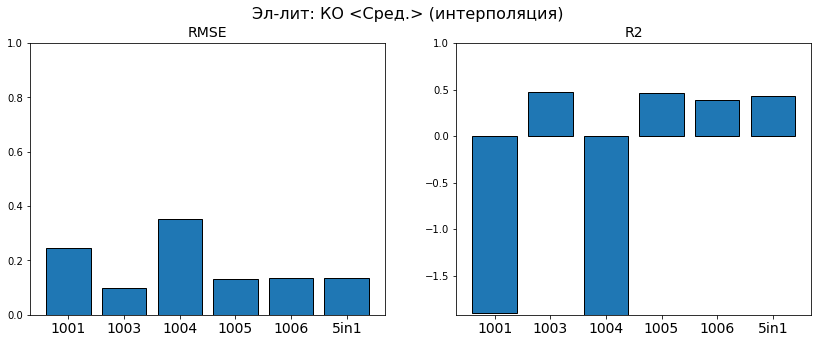

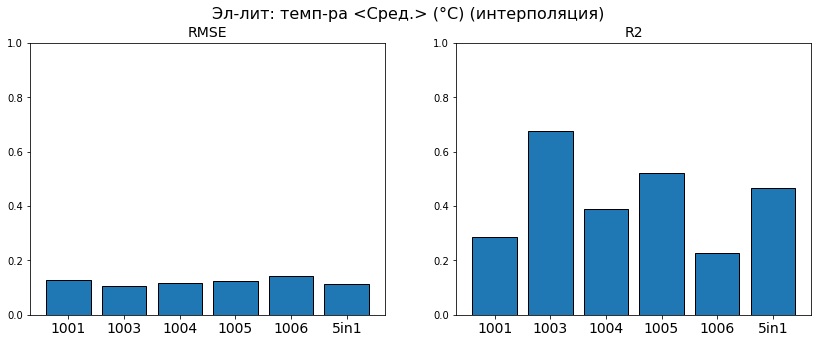

In [18]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseLinearMeanEKO, tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],r2scoreLinearMeanEKO, tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([r2scoreLinearMeanEKO])]),1)
ax[1].set_title('R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('EKO')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsLinRegEKOInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseLinearMeanETEMP, tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],r2scoreLinearMeanETEMP, tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([r2scoreLinearMeanETEMP])]) ,1)
ax[1].set_title('R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('ETEMP')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsLinRegETEMPInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

# метод главных компонент и линейная регрессия

In [19]:
# пример 1001
i=0
dataNoTargets = dataScImpMean[i].drop(columns=['EKO','ETEMP']).values
pcaM=PCA()
newtrain=pcaM.fit_transform(dataNoTargets)

In [20]:
print(np.array_str(pcaM.explained_variance_ratio_*100, precision=2, suppress_small=True))

[24.4  16.44 10.67  8.36  5.09  4.54  4.21  3.85  3.59  3.09  2.59  2.33
  2.07  1.5   1.27  1.17  1.05  0.8   0.63  0.59  0.56  0.36  0.26  0.18
  0.14  0.11  0.08  0.04  0.03  0.  ]


In [21]:
i=0
dataNoTargets = dataScImpMean[i].drop(columns=['EKO','ETEMP']).values
pcaM=PCA(n_components=2)
newtrain=pcaM.fit_transform(dataNoTargets)
trainTargetsEKO=dataScImpMean[i]['EKO']
trainTargetsETEMP=dataScImpMean[i]['ETEMP']

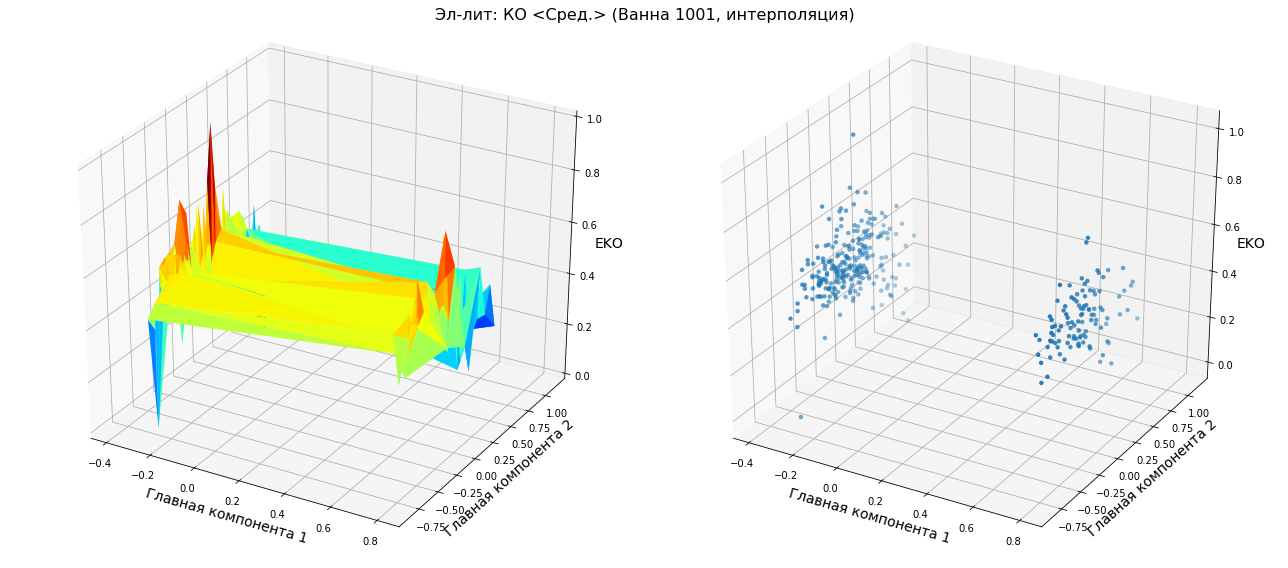

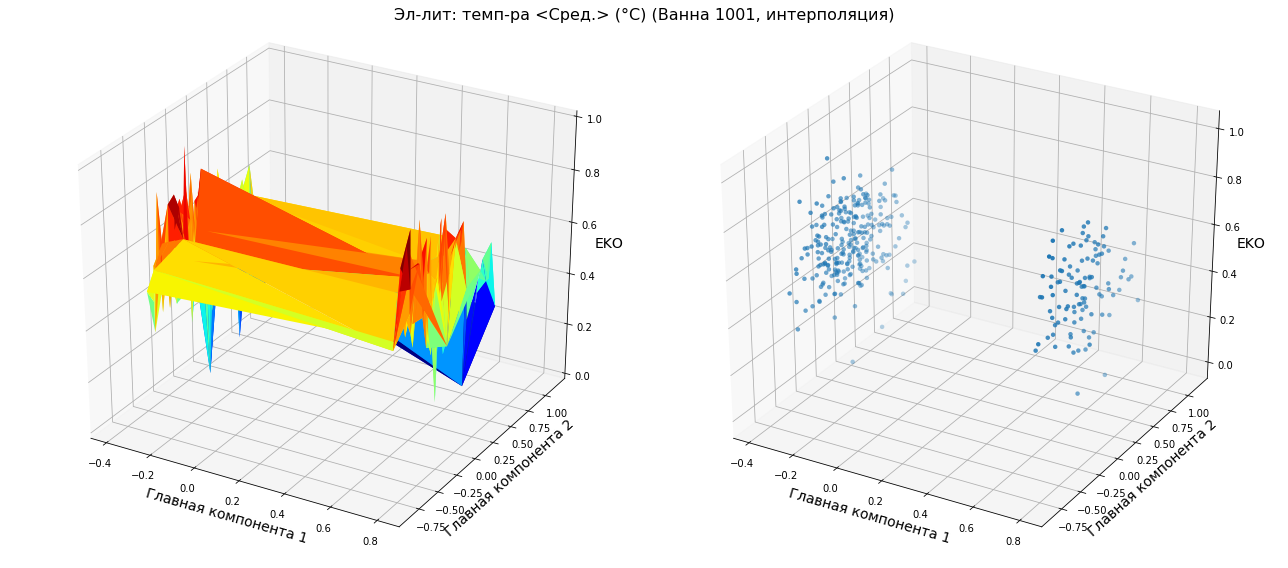

In [22]:
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

plt.suptitle(fullNamesInRussian[paramNames.index('EKO')]+' (Ванна 1001, интерполяция)', fontsize=16)
plt.tight_layout()
plt.savefig('report_v2/pca2dEKOInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

plt.suptitle(fullNamesInRussian[paramNames.index('ETEMP')]+' (Ванна 1001, интерполяция)', fontsize=16)
plt.tight_layout()
plt.savefig('report_v2/pca2dETEMPInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

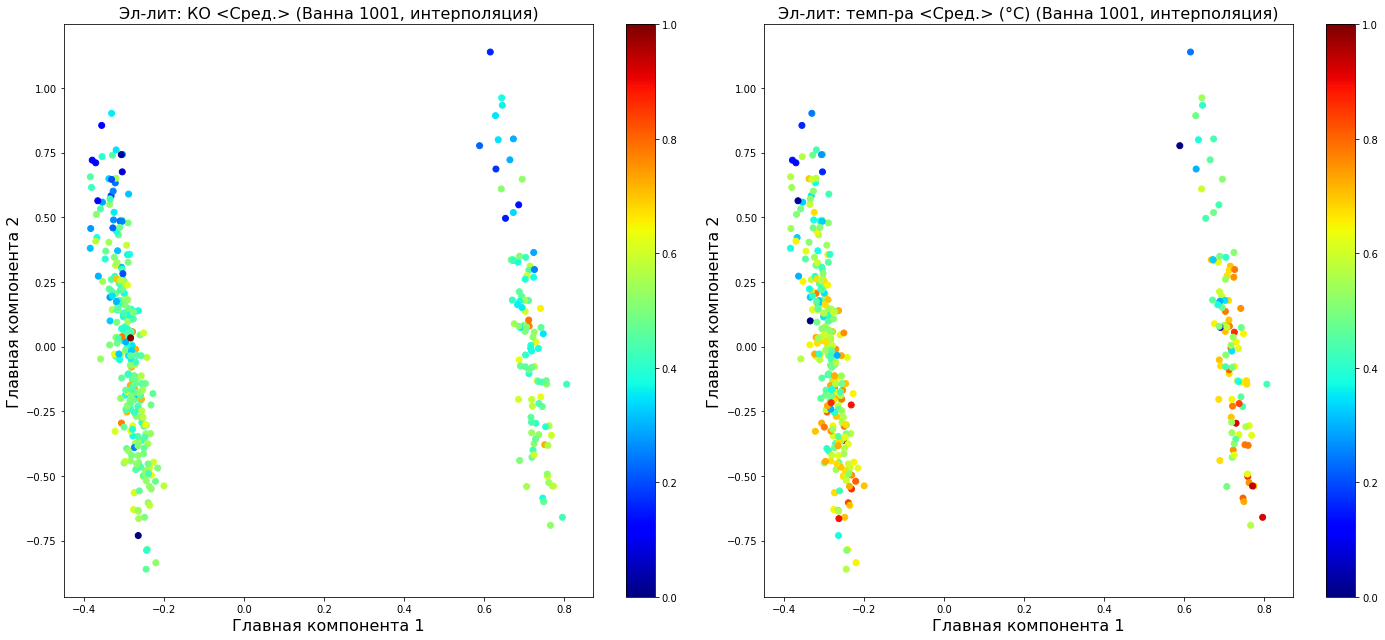

In [23]:
fig, ax = plt.subplots( figsize=(20,9), ncols=2)
ax1=ax[0].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsEKO, cmap=cm.jet)
ax[0].set_xlabel('Главная компонента 1', fontsize=16)
ax[0].set_ylabel('Главная компонента 2', fontsize=16)
ax2=ax[1].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsETEMP, cmap=cm.jet)
ax[1].set_xlabel('Главная компонента 1', fontsize=16)
ax[1].set_ylabel('Главная компонента 2', fontsize=16)
ax[0].set_title(fullNamesInRussian[paramNames.index('EKO')]+' (Ванна 1001, интерполяция)', fontsize=16)
ax[1].set_title(fullNamesInRussian[paramNames.index('ETEMP')]+' (Ванна 1001, интерполяция)', fontsize=16)
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
plt.tight_layout()
plt.savefig('report_v2/pca2dPlainBOTHInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# пример 1004
i=3
dataNoTargets = dataScImpMean[i].drop(columns=['EKO','ETEMP']).values
pcaM=PCA()
newtrain=pcaM.fit_transform(dataNoTargets)

In [25]:
print(np.array_str(pcaM.explained_variance_ratio_*100, precision=2, suppress_small=True))

[25.67 13.27 11.7   7.03  6.3   4.72  3.69  3.45  3.23  2.82  2.78  2.41
  2.22  2.06  1.6   1.39  1.33  1.14  0.73  0.65  0.52  0.37  0.28  0.21
  0.15  0.14  0.08  0.06  0.03  0.  ]


In [26]:
i=3
dataNoTargets = dataScImpMean[i].drop(columns=['EKO','ETEMP']).values
pcaM=PCA(n_components=2)
newtrain=pcaM.fit_transform(dataNoTargets)
trainTargetsEKO=dataScImpMean[i]['EKO']
trainTargetsETEMP=dataScImpMean[i]['ETEMP']

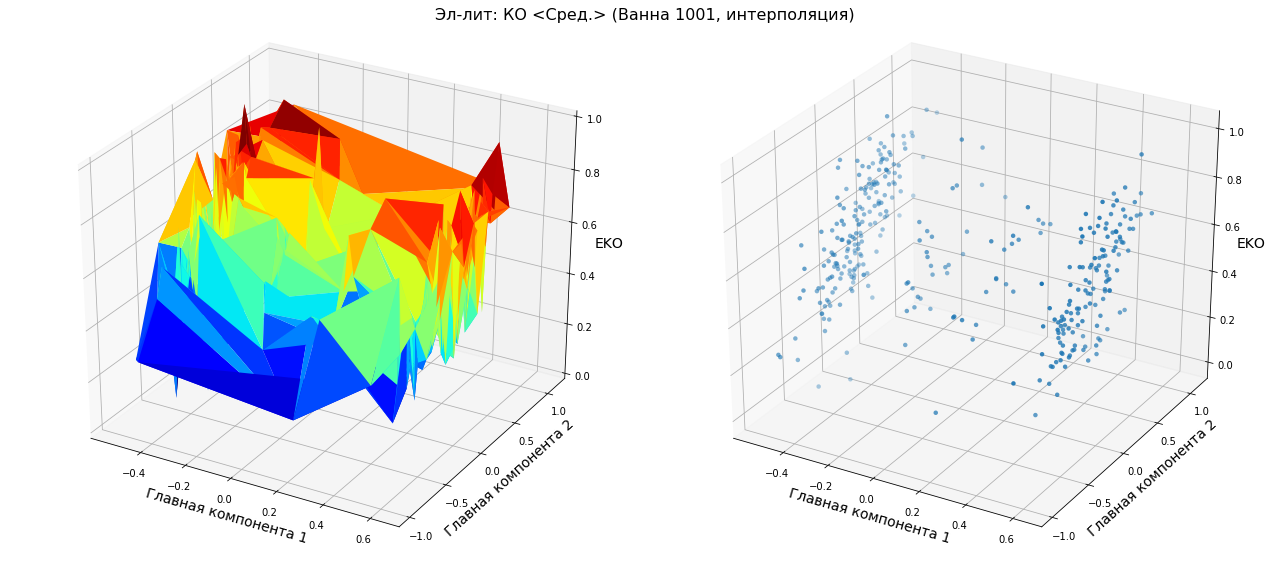

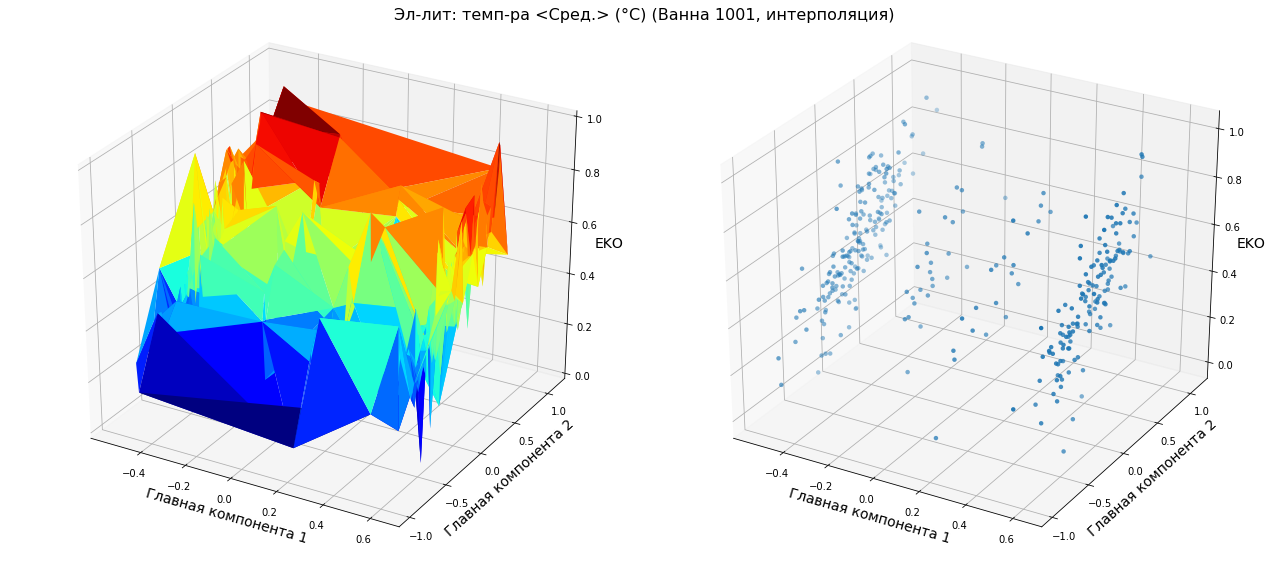

In [27]:
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

plt.suptitle(fullNamesInRussian[paramNames.index('EKO')]+' (Ванна 1001, интерполяция)', fontsize=16)
plt.tight_layout()
plt.savefig('report_v2/pca2dEKOInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

plt.suptitle(fullNamesInRussian[paramNames.index('ETEMP')]+' (Ванна 1001, интерполяция)', fontsize=16)
plt.tight_layout()
plt.savefig('report_v2/pca2dETEMPInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

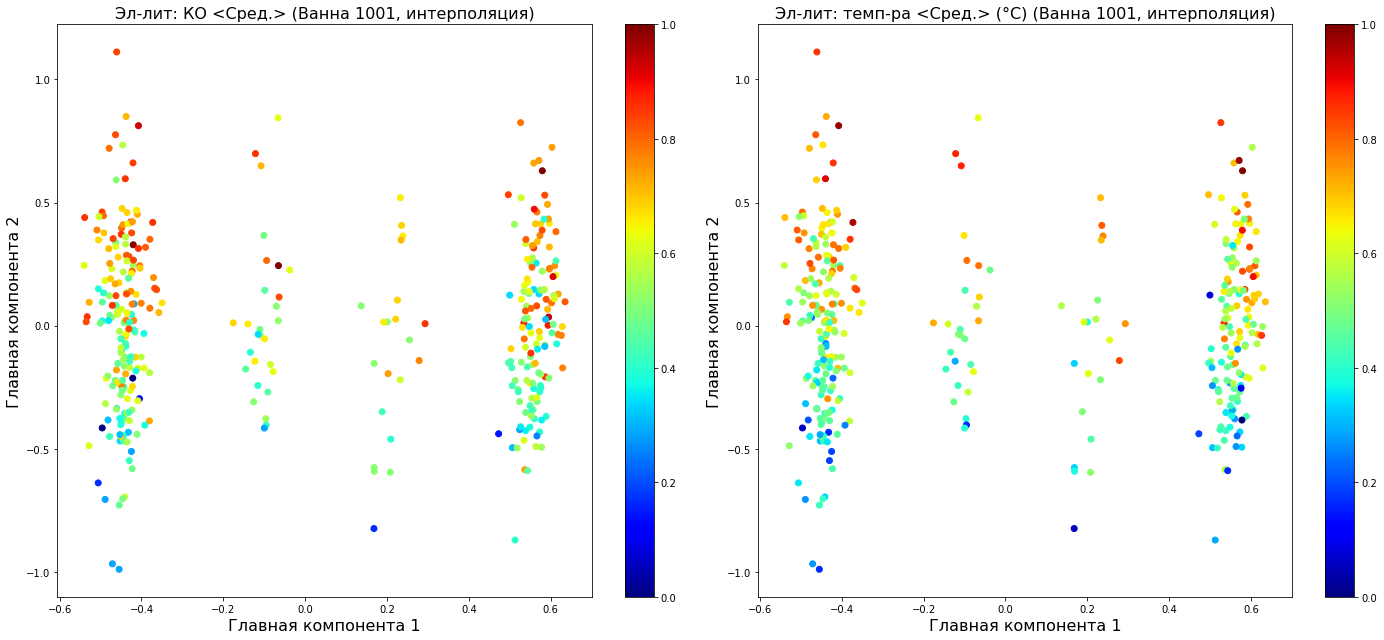

In [28]:
fig, ax = plt.subplots( figsize=(20,9), ncols=2)
ax1=ax[0].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsEKO, cmap=cm.jet)
ax[0].set_xlabel('Главная компонента 1', fontsize=16)
ax[0].set_ylabel('Главная компонента 2', fontsize=16)
ax2=ax[1].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsETEMP, cmap=cm.jet)
ax[1].set_xlabel('Главная компонента 1', fontsize=16)
ax[1].set_ylabel('Главная компонента 2', fontsize=16)
ax[0].set_title(fullNamesInRussian[paramNames.index('EKO')]+' (Ванна 1001, интерполяция)', fontsize=16)
ax[1].set_title(fullNamesInRussian[paramNames.index('ETEMP')]+' (Ванна 1001, интерполяция)', fontsize=16)
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
plt.tight_layout()
plt.savefig('report_v2/pca2dPlainBOTHInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

### тоже самое с 5-в-1

In [29]:
# пример 5-в-1
pcaM=PCA()
newtrain=pcaM.fit_transform(data5ni1Mean.drop(columns=['EKO','ETEMP']).values)

print(np.array_str(pcaM.explained_variance_ratio_*100, precision=2, suppress_small=True))

[22.67 12.93  9.23  7.59  6.5   5.61  4.33  3.99  3.59  3.14  2.81  2.4
  2.19  1.94  1.63  1.55  1.39  1.37  1.02  0.94  0.88  0.6   0.47  0.37
  0.22  0.18  0.17  0.12  0.11  0.07]


In [30]:
# пример 5-в-1
pcaM=PCA(n_components=2)
newtrain=pcaM.fit_transform(data5ni1Mean.drop(columns=['EKO','ETEMP']).values)
trainTargetsEKO=data5ni1Mean['EKO']
trainTargetsETEMP=data5ni1Mean['ETEMP']

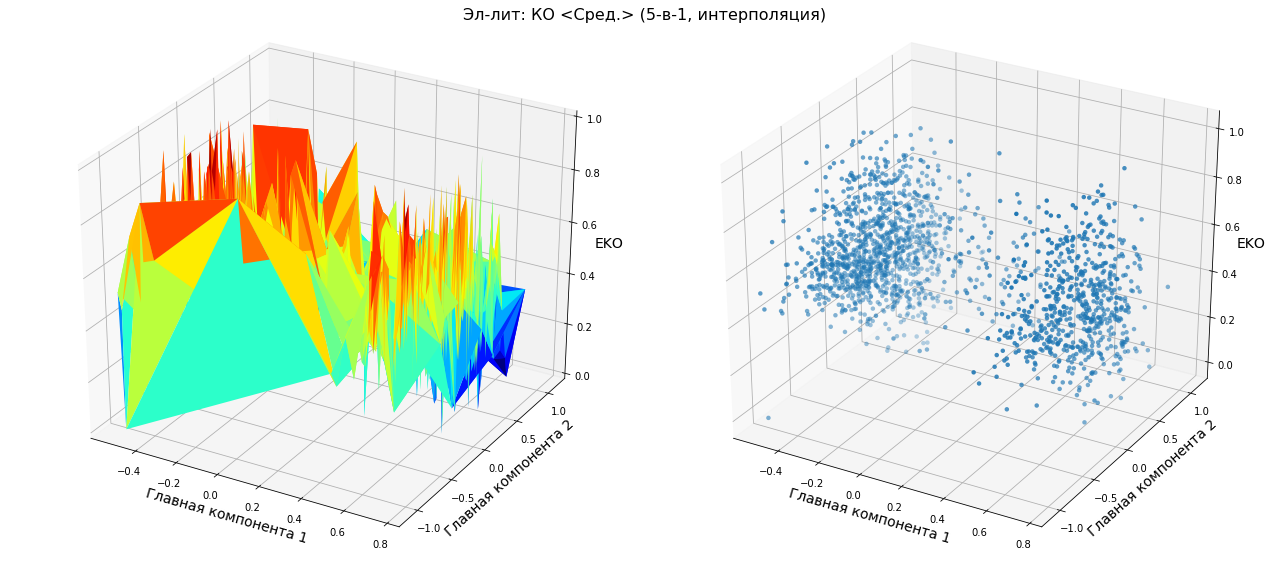

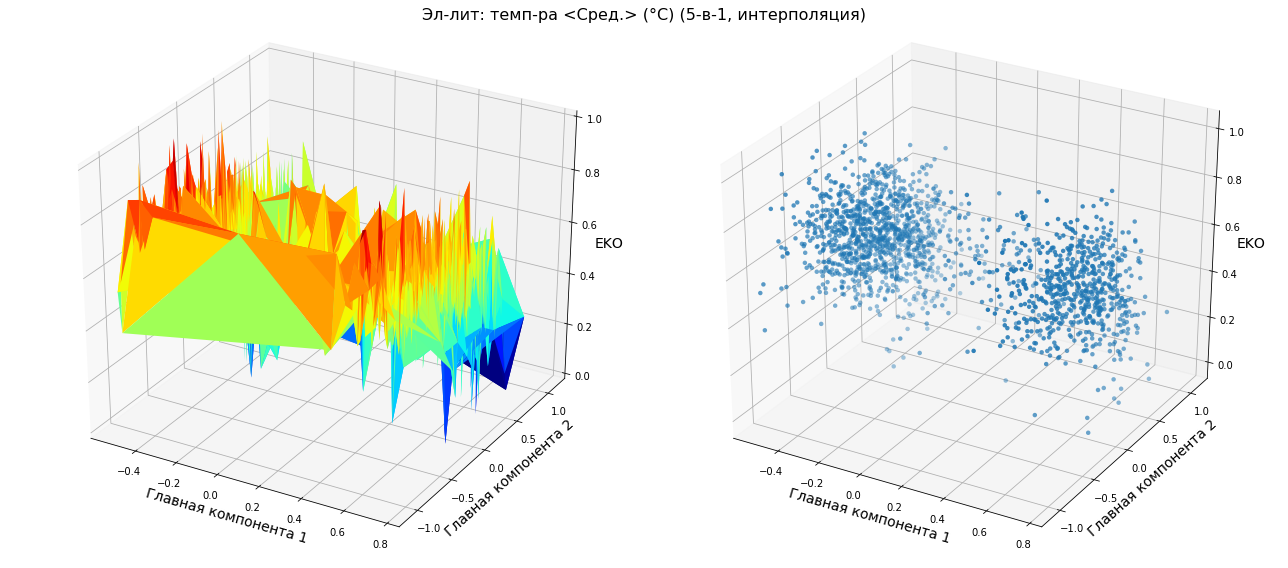

In [31]:
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsEKO, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

plt.suptitle(fullNamesInRussian[paramNames.index('EKO')]+' (5-в-1, интерполяция)', fontsize=16)
plt.tight_layout()
plt.savefig('report_v2/pca2d5in1EKOInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(newtrain[:,0],newtrain[:,1],
            trainTargetsETEMP, cmap=cm.jet, linewidth=0)
ax.set_xlabel('Главная компонента 1', fontsize=14)
ax.set_ylabel('Главная компонента 2', fontsize=14)
ax.set_zlabel('EKO', fontsize=14)

plt.suptitle(fullNamesInRussian[paramNames.index('ETEMP')]+' (5-в-1, интерполяция)', fontsize=16)
plt.tight_layout()
plt.savefig('report_v2/pca2d5in1ETEMPInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

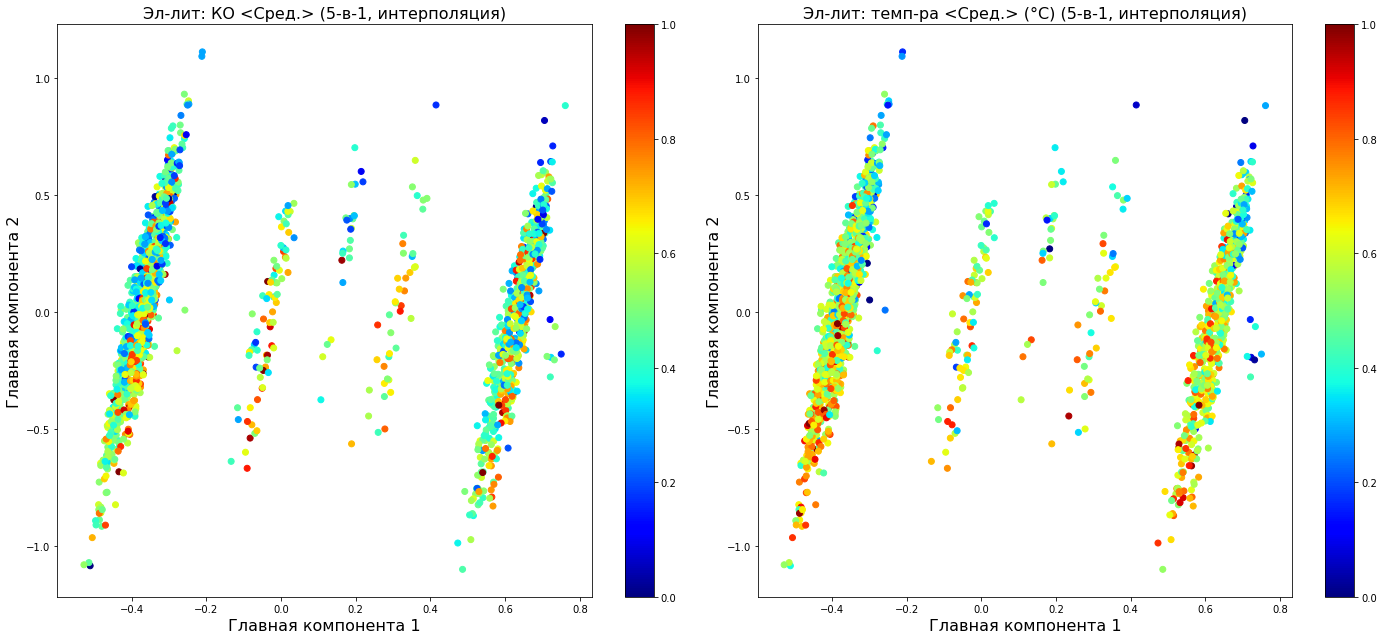

In [32]:
fig, ax = plt.subplots( figsize=(20,9), ncols=2)
ax1=ax[0].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsEKO, cmap=cm.jet)
ax[0].set_xlabel('Главная компонента 1', fontsize=16)
ax[0].set_ylabel('Главная компонента 2', fontsize=16)
ax2=ax[1].scatter(newtrain[:,0],newtrain[:,1], c=trainTargetsETEMP, cmap=cm.jet)
ax[1].set_xlabel('Главная компонента 1', fontsize=16)
ax[1].set_ylabel('Главная компонента 2', fontsize=16)
ax[0].set_title(fullNamesInRussian[paramNames.index('EKO')]+' (5-в-1, интерполяция)', fontsize=16)
ax[1].set_title(fullNamesInRussian[paramNames.index('ETEMP')]+' (5-в-1, интерполяция)', fontsize=16)
fig.colorbar(ax1, ax=ax[0])
fig.colorbar(ax2, ax=ax[1])
plt.tight_layout()
plt.savefig('report_v2/pca2d5in1PlainBOTHInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

## линейная модель c PCA

In [33]:
def gridSerchPCALinearModel(n):

    pcaDataScImpMean=[None]*5
    for i in range(5):
        pcaModel=PCA(n_components=n)
        pcaDataScImpMean[i]=pcaModel.fit_transform(dataScImpMean[i].drop(columns=['EKO','ETEMP']))
        pcaDataScImpMean[i]=pd.DataFrame(pcaDataScImpMean[i])
        pcaDataScImpMean[i]['EKO']=dataScImpMean[i]['EKO'].copy()
        pcaDataScImpMean[i]['ETEMP']=dataScImpMean[i]['ETEMP'].copy()
    
    pcaModel=PCA(n_components=n)
    pcaData5in1ScImpMean=pcaModel.fit_transform(data5ni1Mean.drop(columns=['EKO','ETEMP']))
    pcaData5in1ScImpMean=pd.DataFrame(pcaData5in1ScImpMean)
    pcaData5in1ScImpMean['EKO']=data5ni1Mean['EKO'].copy()
    pcaData5in1ScImpMean['ETEMP']=data5ni1Mean['ETEMP'].copy()

    trainPCAImpMean=[None]*5
    testPCAImpMean=[None]*5
    for i in range(5):
        trainPCAImpMean[i], testPCAImpMean[i] = train_test_split(pcaDataScImpMean[i], test_size=0.25)
    trainPCA5in1ImpMean, testPCA5in1ImpMean = train_test_split(pcaData5in1ScImpMean, test_size=0.25)

    modelPCALinearMeanEKO=[None]*6
    rmsePCALinearMeanEKO=[None]*6
    r2scorePCALinearMeanEKO=[None]*6

    modelPCALinearMeanETEMP=[None]*6
    rmsePCALinearMeanETEMP=[None]*6
    r2scorePCALinearMeanETEMP=[None]*6


    for i in range(5):
        
        # по параметру EKO по ваннам
        trainInputsEKO = trainPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        testInputsEKO = testPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        trainTargetsEKO = trainPCAImpMean[i]['EKO'].values
        testTargetsEKO = testPCAImpMean[i]['EKO'].values
        
        modelPCALinearMeanEKO[i] = LinearRegression()
        modelPCALinearMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
        predictedEKO = modelPCALinearMeanEKO[i].predict(testInputsEKO)
        
        rmsePCALinearMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
        r2scorePCALinearMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

        # по параметру ETEMP по ваннам
        trainInputsETEMP = trainPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        testInputsETEMP = testPCAImpMean[i].drop(columns=['EKO','ETEMP']).values
        trainTargetsETEMP = trainPCAImpMean[i]['ETEMP'].values
        testTargetsETEMP = testPCAImpMean[i]['ETEMP'].values
        
        modelPCALinearMeanETEMP[i] = LinearRegression()
        modelPCALinearMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
        predictedETEMP = modelPCALinearMeanETEMP[i].predict(testInputsETEMP)
        
        rmsePCALinearMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
        r2scorePCALinearMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)

    
    # по параметру EKO 5-в-1
    trainInputs5in1EKO = trainPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    testInputs5in1EKO = testPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    trainTargets5in1EKO = trainPCA5in1ImpMean['EKO'].values
    testTargets5in1EKO = testPCA5in1ImpMean['EKO'].values

    modelPCALinearMeanEKO[5] = LinearRegression()
    modelPCALinearMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
    predictedEKO = modelPCALinearMeanEKO[5].predict(testInputs5in1EKO)

    rmsePCALinearMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
    r2scorePCALinearMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

    # по параметру ETEMP 5-в-1
    trainInputs5in1ETEMP = trainPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    testInputs5in1ETEMP = testPCA5in1ImpMean.drop(columns=['EKO','ETEMP']).values
    trainTargets5in1ETEMP = trainPCA5in1ImpMean['ETEMP'].values
    testTargets5in1ETEMP = testPCA5in1ImpMean['ETEMP'].values

    modelPCALinearMeanETEMP[5] = LinearRegression()
    modelPCALinearMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
    predictedETEMP = modelPCALinearMeanETEMP[5].predict(testInputs5in1ETEMP)

    rmsePCALinearMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
    r2scorePCALinearMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)


    return rmsePCALinearMeanEKO, r2scorePCALinearMeanEKO, rmsePCALinearMeanETEMP, r2scorePCALinearMeanETEMP

In [34]:
maxNumCompPCA=len(dataScImpMean[0].columns)
rezMeanEKO_MSE=[]
rezMeanEKO_R2=[]
rezMeanETEMP_MSE=[]
rezMeanETEMP_R2=[]

for i in range(maxNumCompPCA-1-2):
    _mse1, _r21, _mse2, _r22 = gridSerchPCALinearModel(i+1)
    rezMeanEKO_MSE.append(_mse1)
    rezMeanEKO_R2.append(_r21)
    rezMeanETEMP_MSE.append(_mse2)
    rezMeanETEMP_R2.append(_r22)     

In [35]:
a=np.array(rezMeanEKO_MSE)
b=a.max(axis=0)
print(b)
c=a.argmax(axis=0)
print(c+1)

[0.13230104 0.13701664 0.20098794 0.17625212 0.27443336 0.18302391]
[20  1  1  1 28  3]


In [36]:
rezEKOGridPCA=pd.DataFrame( 
        {
            'maxRMSE_mean': np.array(rezMeanEKO_MSE).min(axis=0), 
            'nPCA_RMSE_mean': np.array(rezMeanEKO_MSE).argmin(axis=0)+1,
            'maxR2_mean': np.array(rezMeanEKO_R2).max(axis=0),
            'nPCA_R2_mean': np.array(rezMeanEKO_R2).argmax(axis=0)+1,
        },
        index=['1001','1003','1004','1005','1006', '5in1']
    )
rezEKOGridPCA

maxRMSE_mean  nPCA_RMSE_mean  maxR2_mean  nPCA_R2_mean
1001      0.089951              11    0.350653            11
1003      0.073486              16    0.562126            16
1004      0.139796              11    0.533464            17
1005      0.110548               9    0.518669             9
1006      0.133961              18    0.359123             9
5in1      0.135348              28    0.446068            21

In [37]:
rezETEMPGridPCA=pd.DataFrame( 
        {
            'maxRMSE_mean': np.array(rezMeanETEMP_MSE).min(axis=0), 
            'nPCA_RMSE_mean': np.array(rezMeanETEMP_MSE).argmin(axis=0)+1,
            'maxR2_mean': np.array(rezMeanETEMP_R2).max(axis=0),
            'nPCA_R2_mean': np.array(rezMeanETEMP_R2).argmax(axis=0)+1,
        },
        index=['1001','1003','1004','1005','1006', '5in1']
    )
rezETEMPGridPCA

maxRMSE_mean  nPCA_RMSE_mean  maxR2_mean  nPCA_R2_mean
1001      0.106233              24    0.460058            28
1003      0.083721              23    0.707445             9
1004      0.112845              26    0.446892            19
1005      0.104743              29    0.634964             8
1006      0.101943              27    0.604738            27
5in1      0.111809              26    0.516704            26

In [38]:
# сохраним в excel
writer = pd.ExcelWriter('report_v2\\rezPCAgridLinearInterpolated.xlsx', engine='xlsxwriter')
rezEKOGridPCA.to_excel(writer, sheet_name='Эл-лит КО cред.')
rezETEMPGridPCA.to_excel(writer, sheet_name='Эл-лит темп-ра cред.')
writer.save()

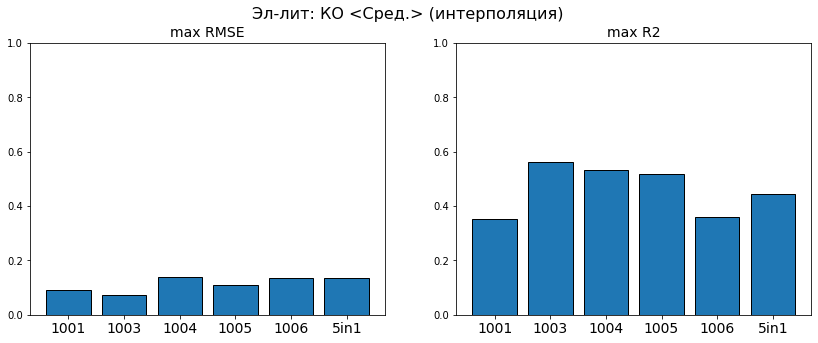

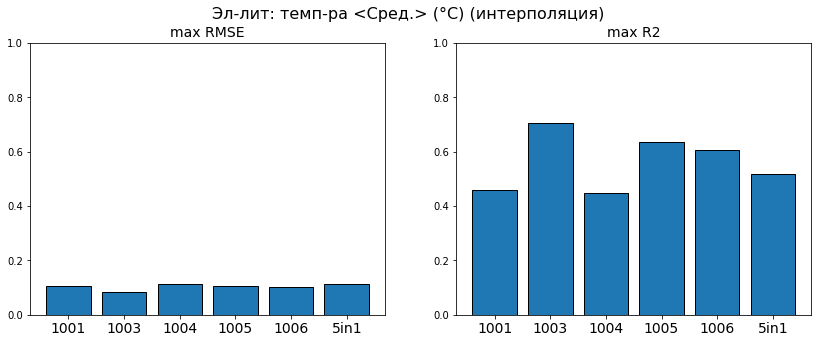

In [39]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rezEKOGridPCA['maxRMSE_mean'], tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('max RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],rezEKOGridPCA['maxR2_mean'], tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([rezEKOGridPCA['maxR2_mean']])]),1)
ax[1].set_title('max R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('EKO')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsSVREKOInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rezETEMPGridPCA['maxRMSE_mean'], tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('max RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],rezETEMPGridPCA['maxR2_mean'], tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([rezETEMPGridPCA['maxR2_mean']])]) ,1)
ax[1].set_title('max R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('ETEMP')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsSVRETEMPInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

# Модель SVR

## Модель SVR поиск гипер-парамтров по решетке

In [40]:
modelSVRMeanEKO=[None]*6
rmseSVRMeanEKO=[None]*6
r2scoreSVRMeanEKO=[None]*6

modelSVRMeanETEMP=[None]*6
rmseSVRMeanETEMP=[None]*6
r2scoreSVRMeanETEMP=[None]*6

for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsEKO = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsEKO,trainTargetsEKO)


    modelSVRMeanEKO[i] = gridSVR.best_estimator_
    modelSVRMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelSVRMeanEKO[i].predict(testInputsEKO)
    
    rmseSVRMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreSVRMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру ETEMP по ваннам
    trainInputsETEMP = trainImpMean[i].drop(columns=['EKO','ETEMP']).values
    testInputsETEMP = testImpMean[i].drop(columns=['EKO','ETEMP']).values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsETEMP,trainTargetsETEMP)


    modelSVRMeanETEMP[i] = gridSVR.best_estimator_
    modelSVRMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelSVRMeanETEMP[i].predict(testInputsETEMP)
    
    rmseSVRMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreSVRMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)


# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1EKO = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1EKO,trainTargets5in1EKO)

modelSVRMeanEKO[5] = gridSVR.best_estimator_
modelSVRMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelSVRMeanEKO[5].predict(testInputs5in1EKO)

rmseSVRMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreSVRMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean.drop(columns=['EKO','ETEMP']).values
testInputs5in1ETEMP = test5in1ImpMean.drop(columns=['EKO','ETEMP']).values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1ETEMP,trainTargets5in1ETEMP)

modelSVRMeanETEMP[5] = gridSVR.best_estimator_
modelSVRMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelSVRMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseSVRMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreSVRMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [41]:
rezEKOGridSVR=pd.DataFrame( 
        {
            'RMSE_mean': rmseSVRMeanEKO, 
            'R2_mean': r2scoreSVRMeanEKO,
        },
        index=['1001','1003','1004','1005','1006', '5in1']
    )
rezEKOGridSVR

RMSE_mean   R2_mean
1001   0.129155  0.186433
1003   0.101961  0.452152
1004   0.172323  0.305540
1005   0.134310  0.451736
1006   0.145168  0.286742
5in1   0.133836  0.455918

In [42]:
rezETEMPGridSVR=pd.DataFrame( 
        {
            'RMSE_mean': rmseSVRMeanETEMP, 
            'R2_mean': r2scoreSVRMeanETEMP,
        },
        index=['1001','1003','1004','1005','1006', '5in1']
    )
rezETEMPGridSVR

RMSE_mean   R2_mean
1001   0.125366  0.316872
1003   0.119065  0.582303
1004   0.124788  0.292681
1005   0.110152  0.620896
1006   0.127648  0.389318
5in1   0.108688  0.510240

In [43]:
# сохраним в excel
writer = pd.ExcelWriter('report_v2\\rezGridSVRinterpolated.xlsx', engine='xlsxwriter')
rezEKOGridSVR.to_excel(writer, sheet_name='Эл-лит КО cред.')
rezETEMPGridSVR.to_excel(writer, sheet_name='Эл-лит темп-ра cред.')
writer.save()

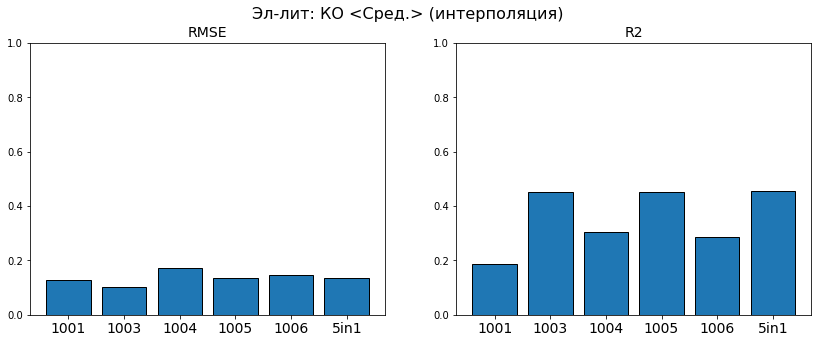

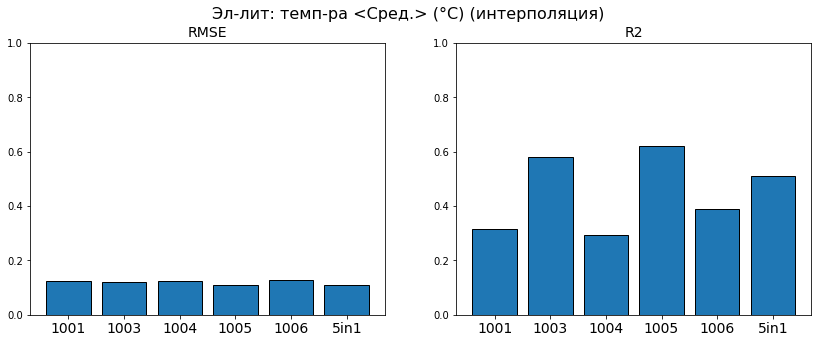

In [44]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanEKO, tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanEKO, tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanEKO])]),1)
ax[1].set_title('R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('EKO')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsSVREKOInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanETEMP, tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanETEMP, tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanETEMP])]) ,1)
ax[1].set_title('R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('ETEMP')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsSVRETEMPInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

## модель SVR по 3 параметрам c наибольшей корреляцией

In [45]:
modelSVRMeanEKO=[None]*6
rmseSVRMeanEKO=[None]*6
r2scoreSVRMeanEKO=[None]*6

modelSVRMeanETEMP=[None]*6
rmseSVRMeanETEMP=[None]*6
r2scoreSVRMeanETEMP=[None]*6

for i in range(5):
    
    # по параметру EKO по ваннам
    trainInputsEKO = trainImpMean[i][['U1','AIF3','RMPR3']].values
    testInputsEKO = testImpMean[i][['U1','AIF3','RMPR3']].values
    trainTargetsEKO = trainImpMean[i]['EKO'].values
    testTargetsEKO = testImpMean[i]['EKO'].values


    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsEKO,trainTargetsEKO)


    modelSVRMeanEKO[i] = gridSVR.best_estimator_
    modelSVRMeanEKO[i].fit(trainInputsEKO,trainTargetsEKO)
    predictedEKO = modelSVRMeanEKO[i].predict(testInputsEKO)
    
    rmseSVRMeanEKO[i] = mean_squared_error(testTargetsEKO, predictedEKO, squared=False)
    r2scoreSVRMeanEKO[i] = r2_score(testTargetsEKO, predictedEKO)

    # по параметру ETEMP по ваннам
    trainInputsETEMP = trainImpMean[i][['U1','AIF3','RMPR3']].values
    testInputsETEMP = testImpMean[i][['U1','AIF3','RMPR3']].values
    trainTargetsETEMP = trainImpMean[i]['ETEMP'].values
    testTargetsETEMP = testImpMean[i]['ETEMP'].values
    
    parameters = {'C':[0.1, 0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    modelSVR=SVR()
    gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
    gridSVR.fit(trainInputsETEMP,trainTargetsETEMP)


    modelSVRMeanETEMP[i] = gridSVR.best_estimator_
    modelSVRMeanETEMP[i].fit(trainInputsETEMP,trainTargetsETEMP)
    predictedETEMP = modelSVRMeanETEMP[i].predict(testInputsETEMP)
    
    rmseSVRMeanETEMP[i] = mean_squared_error(testTargetsETEMP, predictedETEMP, squared=False)
    r2scoreSVRMeanETEMP[i] = r2_score(testTargetsETEMP, predictedETEMP)


# по параметру EKO 5-в-1
trainInputs5in1EKO = train5in1ImpMean[['U1','AIF3','RMPR3']].values
testInputs5in1EKO = test5in1ImpMean[['U1','AIF3','RMPR3']].values
trainTargets5in1EKO = train5in1ImpMean['EKO'].values
testTargets5in1EKO = test5in1ImpMean['EKO'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1EKO,trainTargets5in1EKO)

modelSVRMeanEKO[5] = gridSVR.best_estimator_
modelSVRMeanEKO[5].fit(trainInputs5in1EKO, trainTargets5in1EKO)
predictedEKO = modelSVRMeanEKO[5].predict(testInputs5in1EKO)

rmseSVRMeanEKO[5] = mean_squared_error(testTargets5in1EKO, predictedEKO, squared=False)
r2scoreSVRMeanEKO[5] = r2_score(testTargets5in1EKO, predictedEKO)

# по параметру ETEMP 5-в-1
trainInputs5in1ETEMP = train5in1ImpMean[['U1','AIF3','RMPR3']].values
testInputs5in1ETEMP = test5in1ImpMean[['U1','AIF3','RMPR3']].values
trainTargets5in1ETEMP = train5in1ImpMean['ETEMP'].values
testTargets5in1ETEMP = test5in1ImpMean['ETEMP'].values

parameters = {'C':[0.5, 1, 2.5, 5, 7.5, 10], 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]}
modelSVR=SVR()
gridSVR=GridSearchCV(modelSVR, parameters, scoring='neg_root_mean_squared_error')
gridSVR.fit(trainInputs5in1ETEMP,trainTargets5in1ETEMP)

modelSVRMeanETEMP[5] = gridSVR.best_estimator_
modelSVRMeanETEMP[5].fit(trainInputs5in1ETEMP, trainTargets5in1ETEMP)
predictedETEMP = modelSVRMeanETEMP[5].predict(testInputs5in1ETEMP)

rmseSVRMeanETEMP[5] = mean_squared_error(testTargets5in1ETEMP, predictedETEMP, squared=False)
r2scoreSVRMeanETEMP[5] = r2_score(testTargets5in1ETEMP, predictedETEMP)

In [46]:
rezEKOGridSVRmaxCorr=pd.DataFrame( 
        {
            'RMSE_mean': rmseSVRMeanEKO, 
            'R2_mean': r2scoreSVRMeanEKO,
        },
        index=['1001','1003','1004','1005','1006', '5in1']
    )
rezEKOGridSVRmaxCorr

RMSE_mean   R2_mean
1001   0.135273  0.107527
1003   0.107918  0.386268
1004   0.188318  0.170638
1005   0.148345  0.331167
1006   0.156036  0.175939
5in1   0.161099  0.211687

In [47]:
rezETEMPGridSVRmaxCorr=pd.DataFrame( 
        {
            'RMSE_mean': rmseSVRMeanETEMP, 
            'R2_mean': r2scoreSVRMeanETEMP,
        },
        index=['1001','1003','1004','1005','1006', '5in1']
    )
rezETEMPGridSVRmaxCorr

RMSE_mean   R2_mean
1001   0.126260  0.307092
1003   0.122598  0.557148
1004   0.125117  0.288947
1005   0.114248  0.592177
1006   0.143122  0.232281
5in1   0.119567  0.407287

In [48]:
# сохраним в excel
writer = pd.ExcelWriter('report_v2\\rezGridSVRmaxCorrInterpolated.xlsx', engine='xlsxwriter')
rezEKOGridSVRmaxCorr.to_excel(writer, sheet_name='Эл-лит КО cред.')
rezETEMPGridSVRmaxCorr.to_excel(writer, sheet_name='Эл-лит темп-ра cред.')
writer.save()

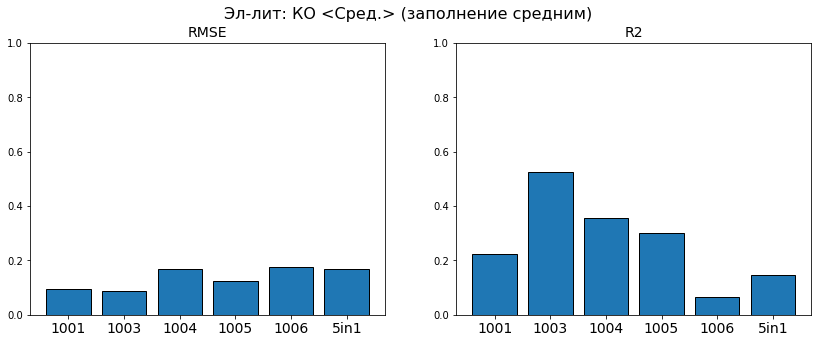

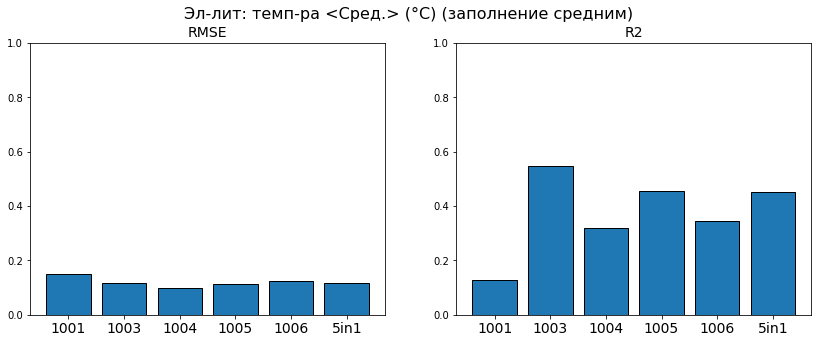

In [51]:
labelsBars=bathNumber[:]
labelsBars.append('5in1')

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanEKO, tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanEKO, tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanEKO])]),1)
ax[1].set_title('R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('EKO')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsSVRmaxCorrEKOInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
ax[0].bar([0,1,2,3,4,5],rmseSVRMeanETEMP, tick_label=labelsBars, ec='black')
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].set_ylim(0,1)
ax[0].set_title('RMSE', fontsize=14)
ax[1].bar([0,1,2,3,4,5],r2scoreSVRMeanETEMP, tick_label=labelsBars, ec='black')
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_ylim(np.min([0, np.min([r2scoreSVRMeanETEMP])]) ,1)
ax[1].set_title('R2', fontsize=14)
fig.suptitle(fullNamesInRussian[paramNames.index('ETEMP')]+' (интерполяция)', fontsize=16)
plt.savefig('report_v2/resultsSVRmaxCorrETEMPInterpoladed.png', dpi=300, bbox_inches='tight')
plt.show()